In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
games_dataset = pd.read_csv('vgsales.csv')
games_dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
games_dataset.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [44]:
games_dataset.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [45]:
len(games_dataset.Publisher.unique())

579

<AxesSubplot: >

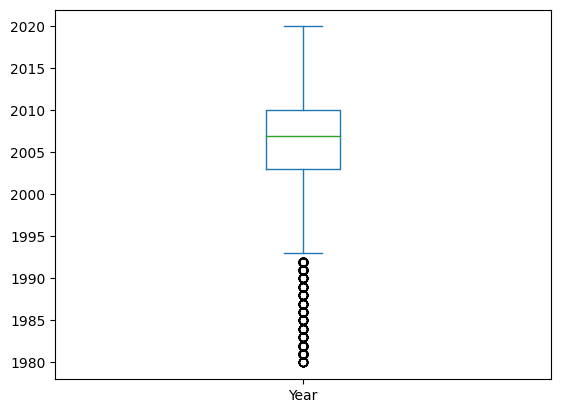

In [46]:
games_dataset['Year'].plot.box()


In [47]:
games_dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


C:\Users\Trupek\AppData\Local\Temp\ipykernel_27416\1089218415.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = games_dataset.corr()


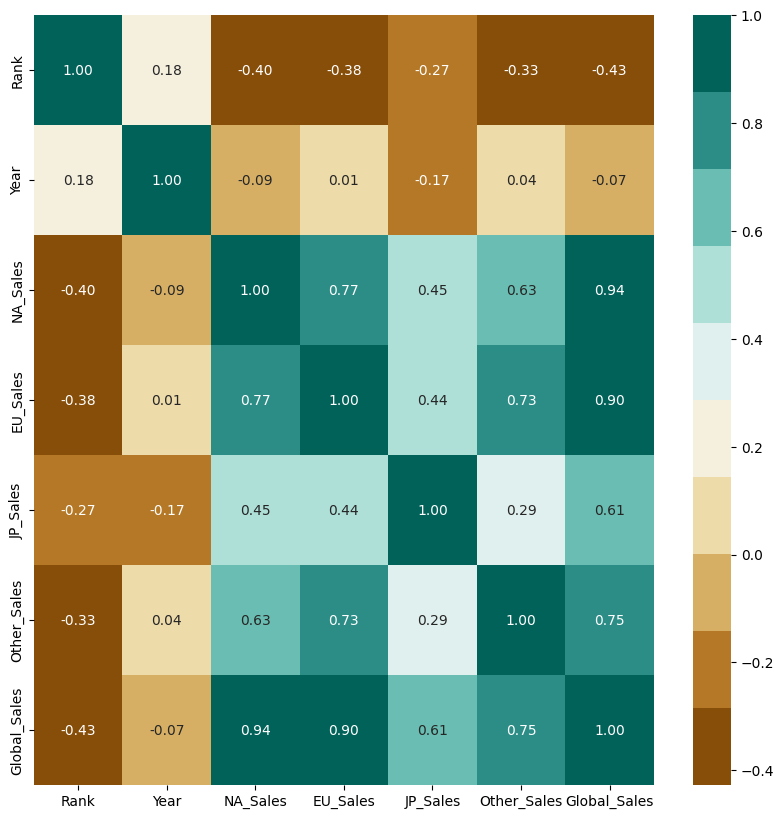

In [48]:
correlations = games_dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

# Deleting unnecessary columns

In [49]:
games_dataset.drop('Name', inplace=True, axis=1)
games_dataset.drop('Rank', inplace=True, axis=1)
games_dataset.head(5)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
games_dataset = games_dataset.drop(games_dataset[games_dataset.Year < 1995].index)
games_dataset = games_dataset.drop(games_dataset[games_dataset.Year > 2019].index)

<AxesSubplot: >

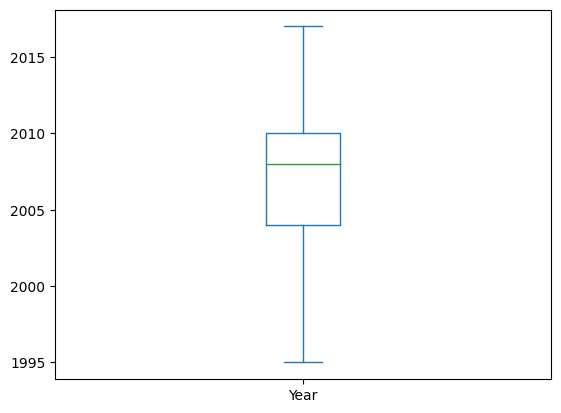

In [51]:
games_dataset['Year'].plot.box()

# Normalizing useful data to int types

In [52]:
def convert_to_int_range(df, column_name):
    column_list = df[column_name].unique()
    
    column_dict = {}
    
    for i in range(len(column_list)):
        column_dict[column_list[i]] = i + 1
        
    return df.replace(column_dict.keys(), column_dict.values())

In [53]:
games_dataset = convert_to_int_range(games_dataset, 'Platform')
games_dataset = convert_to_int_range(games_dataset, 'Publisher')
games_dataset = convert_to_int_range(games_dataset, 'Genre')

In [54]:
games_dataset

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,1,1,41.49,29.02,3.77,8.46,82.74
2,1,2008.0,2,1,15.85,12.88,3.79,3.31,35.82
3,1,2009.0,1,1,15.75,11.01,3.28,2.96,33.00
4,2,1996.0,3,1,11.27,8.89,10.22,1.00,31.37
6,3,2006.0,4,1,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...
16593,7,2002.0,4,172,0.01,0.00,0.00,0.00,0.01
16594,16,2003.0,9,48,0.01,0.00,0.00,0.00,0.01
16595,6,2008.0,2,5,0.00,0.00,0.00,0.00,0.01
16596,3,2010.0,8,479,0.00,0.01,0.00,0.00,0.01
